# simple model

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


# load data

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_name = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [4]:
data = {
    "train_images": train_images,
    "test_images": test_images,
    "train_labels": train_labels,
    "test_labels": test_labels
}

## type

In [5]:
for key in data:
    print(f"{key}: {type(data[key])}")

train_images: <class 'numpy.ndarray'>
test_images: <class 'numpy.ndarray'>
train_labels: <class 'numpy.ndarray'>
test_labels: <class 'numpy.ndarray'>


## shape

In [6]:
for key in data:
    print(f"{key}: {data[key].shape}")

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)
train_labels: (60000,)
test_labels: (10000,)


## range

In [7]:
for key in data:
    print(f"{key}: {data[key].max()},{data[key].min()} ")

train_images: 255,0 
test_images: 255,0 
train_labels: 9,0 
test_labels: 9,0 


## labels

In [8]:
np.unique(train_labels), np.unique(test_labels)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

## sample

In [9]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## look at data

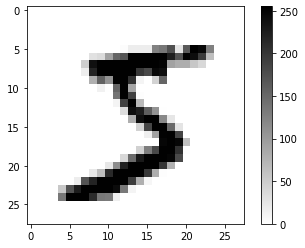

In [10]:
plt.figure()
# plt.imshow(train_images[0])
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [11]:
train_labels[0]

5

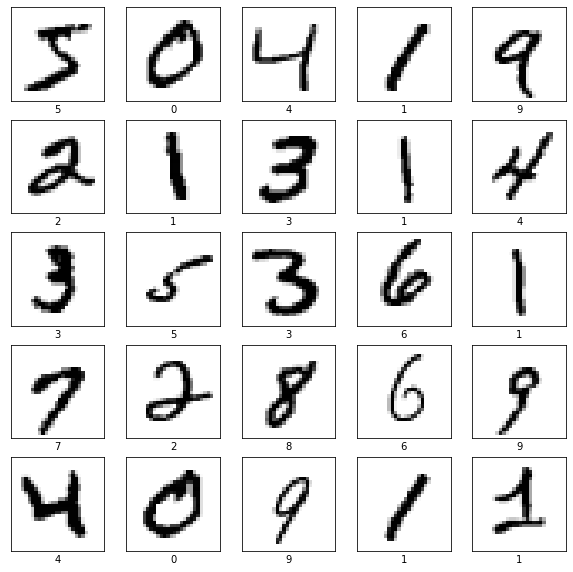

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])

plt.show()

# preprocess data

In [13]:
train_images_norm = train_images / 255.0
test_images_norm = test_images /255.0

In [14]:
train_images_norm.min(), train_images_norm.max()

(0.0, 1.0)

In [15]:
train_images_norm.min(), train_images_norm.max()

(0.0, 1.0)

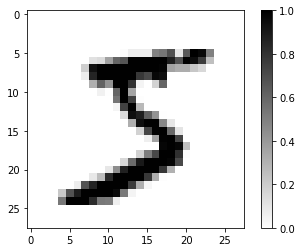

In [16]:
plt.figure()
# plt.imshow(train_images[0])
plt.imshow(train_images_norm[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

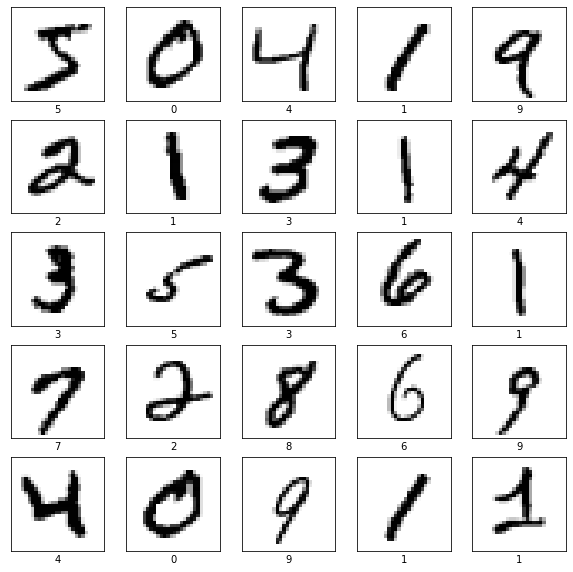

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_norm[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])

plt.show()

# augument data

In [18]:
train_images_norm_4dim = np.expand_dims(train_images_norm, 3)

In [19]:
data_augumentation_layers = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(
        factor=0.1,
        fill_mode="constant",
        fill_value=0
    ),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(
        height_factor=0.1,
        width_factor=0.1,
        fill_mode="constant",
        fill_value=0,
    ),
    tf.keras.layers.experimental.preprocessing.RandomZoom(
        height_factor=0.3,
        width_factor=0.3,
        fill_mode="constant",
        fill_value=0,
    ),
])

In [20]:
train_images_norm_4dim.shape

(60000, 28, 28, 1)

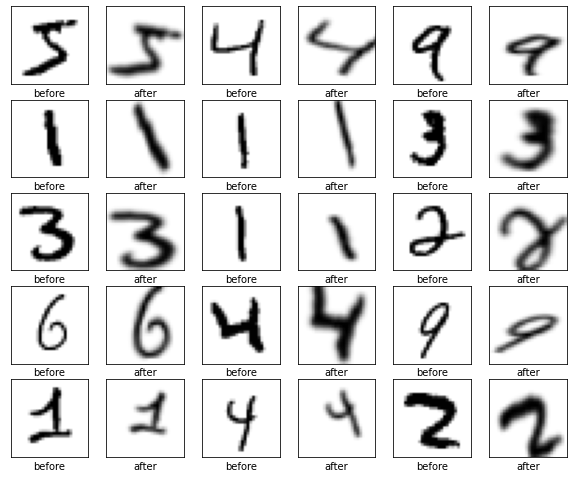

In [21]:
augmented_images = data_augumentation_layers(train_images_norm_4dim)
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    if(i%2==0):
        plt.imshow(train_images_norm_4dim[i], cmap=plt.cm.binary)
        plt.xlabel("before")
    else:
        plt.imshow(augmented_images[i-1], cmap=plt.cm.binary)
        plt.xlabel("after")

# build the model

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

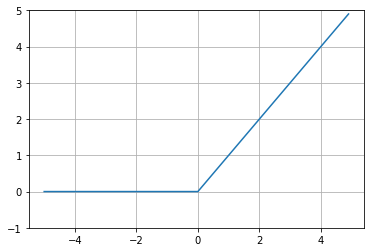

In [23]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
plt.ylim(-1, 5)
plt.grid()
plt.plot(x, relu(x))
plt.show()

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# compile the model

In [25]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"]
)

# fit

In [26]:
model.fit(
    augmented_images,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 2s 813us/step - loss: 1.2344 - accuracy: 0.60320s - loss: 1.3523 
Epoch 2/5
1875/1875 [==============================] - 1s 755us/step - loss: 0.4829 - accuracy: 0.8568
Epoch 3/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.3772 - accuracy: 0.8851
Epoch 4/5
1875/1875 [==============================] - 2s 850us/step - loss: 0.3230 - accuracy: 0.9024
Epoch 5/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.2790 - accuracy: 0.9147


In [27]:
60000 / 32

1875.0

# evaluate

In [28]:
model.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 0s - loss: 0.1445 - accuracy: 0.9553


[0.1444864273071289, 0.955299973487854]

In [29]:
10000 / 32

312.5

# predict

In [30]:
raw_predictions = model.predict(test_images_norm)

In [31]:
raw_predictions.shape

(10000, 10)

In [32]:
raw_predictions[0]

array([ -7.359403  ,  -2.6965766 ,   2.0881543 ,   3.7384686 ,
        -9.400956  ,  -3.6956747 , -16.074356  ,  10.947409  ,
        -4.4515467 ,   0.68600506], dtype=float32)

In [33]:
np.argmax(raw_predictions[0])

7

In [34]:
test_labels[0]

7

## prob model

In [35]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [36]:
predictions = prob_model.predict(test_images_norm)

In [37]:
predictions.shape

(10000, 10)

In [38]:
predictions[0]

array([1.1195759e-08, 1.1860238e-06, 1.4193048e-04, 7.3926174e-04,
       1.4535104e-09, 4.3670758e-07, 1.8373749e-12, 9.9908197e-01,
       2.0507835e-07, 3.4924484e-05], dtype=float32)

In [39]:
predictions[0].sum()

0.9999999

In [40]:
np.argmax(predictions[0])

7

In [41]:
np.argsort(-predictions[0])

array([7, 3, 2, 9, 1, 5, 8, 0, 4, 6])

In [42]:
np.argsort(-raw_predictions[0])

array([7, 3, 2, 9, 1, 5, 8, 0, 4, 6])

# verify model

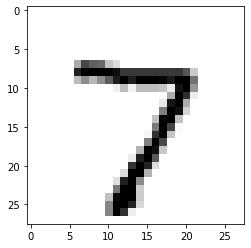

In [43]:
plt.imshow(test_images_norm[0], cmap=plt.cm.binary)
plt.show()

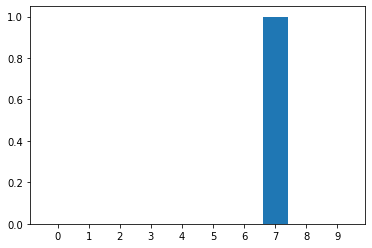

In [44]:
plt.bar(range(10), predictions[0])
plt.xticks(range(10))
plt.show()

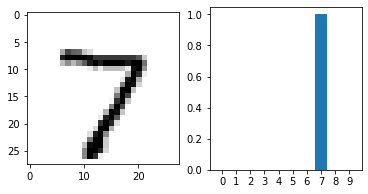

In [45]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(test_images_norm[0], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.bar(range(10), predictions[0])
plt.xticks(range(10))

plt.show()

In [46]:
def verify_prediction(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(test_images_norm[i], cmap=plt.cm.binary)

    plt.subplot(1,2,2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))

    plt.show()

In [47]:
prob_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
)

In [48]:
prob_model.evaluate(test_images_norm,test_labels, verbose=2)

313/313 - 0s - loss: 0.1445 - sparse_categorical_accuracy: 0.9553


[0.1444864273071289, 0.955299973487854]

# save and load the model

In [49]:
prob_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
)

prob_model.save("../saved_models/augumented_model.h5")

In [50]:
loaded_model = tf.keras.models.load_model("../saved_models/augumented_model.h5")

In [51]:
loaded_model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 0s 581us/step - loss: 0.1445 - sparse_categorical_accuracy: 0.9553


[0.1444864273071289, 0.955299973487854]

In [52]:
prob_model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 0s 592us/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9496


[0.1444864273071289, 0.955299973487854]